In [39]:
import os
import pandas as pd
base_path = os.getcwd()
folder = '/Dataset/AIGCQA-20K/'

In [ ]:
# import openpyxl
# import csv# open zip file
# import zipfile


# def xlsx_to_csv(xlsx_file, csv_file, sheet_name=None):
#     # Load the Excel workbook
#     workbook = openpyxl.load_workbook(xlsx_file, data_only=True)

#     # Select the active sheet or a specific one
#     sheet = workbook[sheet_name] if sheet_name else workbook.active

#     # Open a CSV file to write data
#     with open(csv_file, "w", newline="", encoding="utf-8") as csv_f:
#         writer = csv.writer(csv_f)

#         # Write each row from XLSX to CSV
#         for row in sheet.iter_rows(values_only=True):
#             writer.writerow(row)

#     print(f"Conversion complete: {csv_file}")

# # Example usage
# xlsx_to_csv(f'{base_path}{folder}info_train.xlsx', f'{base_path}{folder}info_train.csv', sheet_name='Sheet1')
# xlsx_to_csv(f'{base_path}{folder}info_val.xlsx', f'{base_path}{folder}info_val.csv', sheet_name='Sheet1')
# xlsx_to_csv(f'{base_path}{folder}info_test.xlsx', f'{base_path}{folder}info_test.csv', sheet_name='Sheet1')


# def unzip_file(zip_file, destination):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(destination)

# unzip_file(f'{base_path}{folder}test.zip', f'{base_path}{folder}')
# unzip_file(f'{base_path}{folder}train.zip', f'{base_path}{folder}')
# unzip_file(f'{base_path}{folder}val.zip', f'{base_path}{folder}')



Train:Val:Test ratio is 20:70:10 or 2:7:1.

In [42]:
import json

with open(f'{base_path}{folder}AIGCQA-30K.json') as f:
    data = json.load(f)
    # number of elements in the json file
    print(len(data))

14000


In [ ]:
def get_df_from_file(filename):
    with open(f'{base_path}{folder}{filename}', 'r') as f:
        df = pd.read_csv(f)
        print(f'dimension: {df.shape}')
        print(f'features: {df.keys()}')

    return df
      
        

print('ALL ANNOTATIONS')
merged_df = get_df_from_file('annotations.csv')
# print unique values of the column 'model'

print('--------------------------------')
print('TEST')
test_df = get_df_from_file('annotations_test.csv')
print('--------------------------------')
print('TRAIN')
train_df= get_df_from_file('annotations_train.csv')
print('--------------------------------')
print('VAL')
val_df = get_df_from_file('annotations_val.csv')

ALL ANNOTATIONS
dimension: (20000, 8)
features: Index(['name', 'prompt', 'model', 'iter', 'cfg', 'width', 'height', 'mos'], dtype='object')
--------------------------------
TEST
dimension: (4000, 2)
features: Index(['name', 'prompt'], dtype='object')
--------------------------------
TRAIN
dimension: (14000, 3)
features: Index(['name', 'prompt', 'mos'], dtype='object')
--------------------------------
VAL
dimension: (2000, 2)
features: Index(['name', 'prompt'], dtype='object')


#### Utils to show the images in the dataset

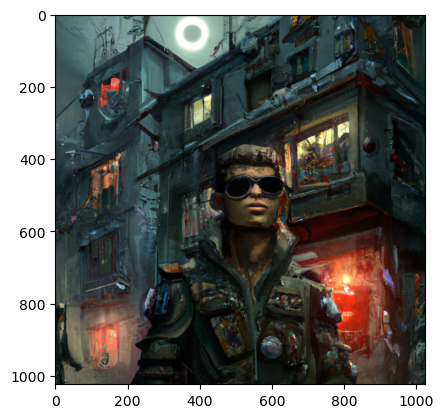

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(base_path):
    # Read the image
    img = plt.imread(base_path)
    # Display the image
    plt.imshow(img)
    plt.show()

def get_images_names(df,num_images):
    images = []
    for i in range(num_images):
        images.append(df.iloc[i]['name'])
    return images

def show_images(df, num_images, folder='train'):
    images = get_images_names(df,num_images)
    for image in images:
        show_image(f'{base_path}{folder}{folder}/{image}')

show_images(train_df, 1, 'train')

